<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# CAPSTONE : Ubisoft's Assassin's Creed IV – Predicting Topics From Reviews

# Part 2 – Data Cleaning & Exploratory Data Analysis

---
<a id='Background'></a>

# Background & Problem Statement
---

[Ubisoft](https://www.ubisoft.com/en-us/company/about-us) is a leading company in the gaming industry. Some [popular games](https://www.thegamer.com/ubisoft-best-games/#assassin-rsquo-s-creed-4-black-flag) include the famous Assassin's Creed series, Far Cry, Tom Clancy, as well as Rayman, just to name a few. Ubisoft has been developing a new game over the past couple of years, called "Skull & Bones". This upcoming game was [inspired by their most popular Assassin's Creed series, "Assassin's Creed IV: Black Flag"](https://screenrant.com/skull-and-bones-best-game-recommendations/).

The upcoming game, [first announced in 2017](https://www.pcgamer.com/ubisoft-announces-skull-and-bones-an-open-world-multiplayer-pirate-game/) has been delayed multiple times, and most recently [delayed till 2024](https://www.thumbculture.co.uk/skull-and-bones-misses-march-release). Ubisoft has released a statment saying they would want to "showcase a much more polished and balanced experience" in their game.

Ubisoft currently has not been addressing much of user's reviews and feedback for game improvement. Posing as someone who is working for Ubisoft's data team, I am interested in  <font color = 'green'>**looking into the reviews of Assassin's Creed IV: Black Flag, and using Data Science to get insights from reviews to identify topics which reviews talk about** </font>. This is so Ubisoft can further improve those particular elements of their game, as well as include and improve the appropriate elements for their upcoming Skull & Bones game, to match the polished standard they are looking for.

For this project in particular, I will be using OneVsRestClassifier, ClassifierChain, and LabelPowerset as the developing models to perform multi-label classifications. Since the data that was retrieved from Steam does not have a column with specific topics in each review, we will first use an unsupervised model to obtain the labels so we have a result column to compare our results to.

In [184]:
# import nltk
# nltk.download('stopwords')
# !pip install contractions
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.6 MB/s eta 0:00:0000:01


In [218]:
# Importing all libraries used: 

import pandas as pd
import os
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk import ngrams, FreqDist
import re
import string
import contractions

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer


## Cleaning

### Assassin's Creed

In [99]:
ass_creed = pd.read_csv('../data/assassins_creed_reviews.csv')

In [100]:
ass_creed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22264 entries, 0 to 22263
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   steamid                      22264 non-null  int64  
 1   num_games_owned              22264 non-null  int64  
 2   num_reviews                  22264 non-null  int64  
 3   playtime_forever             22264 non-null  int64  
 4   playtime_last_two_weeks      22264 non-null  int64  
 5   playtime_at_review           22236 non-null  float64
 6   last_played                  22264 non-null  int64  
 7   recommendationid             22264 non-null  int64  
 8   language                     22264 non-null  object 
 9   review                       22181 non-null  object 
 10  timestamp_created            22264 non-null  int64  
 11  timestamp_updated            22264 non-null  int64  
 12  voted_up                     22264 non-null  bool   
 13  votes_up        

Let's go down the line for a cleaner clean up process

#### `steamid`

The main concern or aim is to see if there are repeat reviews from the same user. This would skew the results to be biased towards their view, and we would like to eliminate this.

In [101]:
# Getting sum of total number of unique values in the 'steamid' column
len(ass_creed['steamid'].unique())

22264

The total number of unique values in the `steamid` column tallies with the total number of rows in the column. This means there were no repeat reviews from the same user.

Now that we've established this, there is no added value this column holds, as there are no insights which the column can provide. Hence, we will drop this column now.

In [102]:
ass_creed.drop(columns = 'steamid', inplace = True)

In [103]:
ass_creed.head()

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china
0,267,21,2856,0,2856.0,1518982944,85460916,english,The only game where i avoid fast travel.,1611779242,1611779242,True,3748,185,0.986815,11,True,False,False,False
1,0,52,1838,0,1838.0,1593601946,76223418,english,This is the Best Assassins Creed game and Prob...,1600521179,1600521179,True,2558,37,0.979318,11,True,False,False,False
2,0,2,117391,77,90196.0,1693020785,69682784,english,"Best game ever, iv'e been playing from day one...",1590260976,1590260976,True,2190,227,0.979193,0,True,False,False,False
3,77,4,4719,0,4036.0,1617472093,88206852,english,Shanties Before Panties,1615404962,1615404962,True,2174,897,0.974363,11,True,False,False,False
4,0,10,1592,0,1177.0,1644543449,71445029,english,Best part of the game are the sea shanties. Lo...,1593217346,1593217346,True,1041,240,0.958593,0,True,False,False,False


#### `num_games_owned`, `num_reviews`, `playtime_forever`, `playtime_last_two_weeks`

The `num_games_owned` column is recognised as integer type. This means the column does not have any corrupted values. For this column, it is okay for there to be repeat values, as it does not provide biasness or other circumstances we would need to be aware about.

The same thing applies to the columns `num_reviews`, `playtime_forever`, and `playtime_last_two_weeks`. Hence, we will move on to clean the next column.

#### `playtime_at_review`

The `playtime_at_review` column is recognised as a float type, and there are some NA values as well. Let's take a closer look at these.

In [104]:
ass_creed[ass_creed['playtime_at_review'].isnull()]

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china
945,0,94,5361,0,NaN,1484552507,28702203,english,Too busy playing this damn game to write a lon...,1482822863,1482824960,True,4,0,0.550401,1,False,False,False,False
2764,193,67,6944,0,NaN,1665238498,28823149,english,best game,1483093045,1483093045,True,1,0,0.523810,0,True,False,False,False
3085,0,1,2944,0,NaN,1390531664,8533722,english,I love it!!! Finally a good open world pirate ...,1388761911,1388761911,True,2,0,0.523810,0,True,False,False,False
3494,278,2,1508,0,NaN,1388969178,8498872,english,the best series ever,1388634702,1388634702,True,2,0,0.521739,0,True,False,False,False
3982,0,28,3830,0,NaN,1483651611,28848865,english,1 was good. 2 was great. 3 was meh.\n\nThis on...,1483142251,1483142251,True,1,0,0.514726,0,True,False,False,False
4754,0,18,2555,0,NaN,1388511182,25426466,english,i played this mostly on the ps4 for hundreds o...,1473430952,1473430952,True,1,0,0.502366,0,True,False,False,False
4976,0,6,104,0,NaN,1482903751,28781012,english,Purchased the game and could not get it load. ...,1482995855,1482995855,False,1,0,0.500452,0,True,False,False,False
5321,104,6,3900,0,NaN,1483987857,28809980,english,Uns dos melhores Assassin’s ou o melhor.,1483056555,1483056555,True,0,0,0.497512,0,True,True,False,False
6036,1171,35,2373,0,NaN,1547412748,28831234,english,The best game in the series 100% 10/10 would d...,1483110361,1483128219,True,2,0,0.483221,0,True,False,False,False
6176,0,3,10957,0,NaN,1391980360,8734814,english,Saddled with UPlay and the controls feel obnox...,1389922069,1389922069,False,1,0,0.480000,0,True,False,False,False


Let's compare the first 20 rows and the values of the `playtime_at_review` values, and find the most appropriate values to impute.

In [105]:
#Checking the first 20 rows
ass_creed.head(20)

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china
0,267,21,2856,0,2856.0,1518982944,85460916,english,The only game where i avoid fast travel.,1611779242,1611779242,True,3748,185,0.986815,11,True,False,False,False
1,0,52,1838,0,1838.0,1593601946,76223418,english,This is the Best Assassins Creed game and Prob...,1600521179,1600521179,True,2558,37,0.979318,11,True,False,False,False
2,0,2,117391,77,90196.0,1693020785,69682784,english,"Best game ever, iv'e been playing from day one...",1590260976,1590260976,True,2190,227,0.979193,0,True,False,False,False
3,77,4,4719,0,4036.0,1617472093,88206852,english,Shanties Before Panties,1615404962,1615404962,True,2174,897,0.974363,11,True,False,False,False
4,0,10,1592,0,1177.0,1644543449,71445029,english,Best part of the game are the sea shanties. Lo...,1593217346,1593217346,True,1041,240,0.958593,0,True,False,False,False
5,406,10,2231,0,2014.0,1480278564,13131965,english,Pros:\n-Beautiful graphics\n-Huge artistic wor...,1417221514,1417221514,True,1593,152,0.948977,32,True,False,False,False
6,301,9,3243,0,3243.0,1400995866,12404269,english,The best Assassin's Creed game since Assassin'...,1412716528,1412716528,True,666,59,0.934860,9,False,False,False,False
7,258,29,2726,0,21.0,1626866017,38080503,english,on 12th december its free on uplay\n\nedit: i ...,1512483851,1652728919,True,1630,1007,0.928268,384,True,False,False,False
8,69,13,4059,0,2813.0,1520613677,16882470,english,"Before I start, I just want to address one thi...",1436038001,1443919941,True,323,21,0.927004,3,True,False,False,False
9,253,2,6917,0,1180.0,1496521459,32209969,english,I love this game.. what can be better than lis...,1496704983,1496704983,True,661,58,0.907360,0,True,False,False,False


Upon examining the values closer, we see a large number of the `playtime_at_review` values are close to or the same as the `playtime_forever` values for each review. 

Extrapolating this to the current null values, we shall then impute the values from `playtime_forever` column to the null values of the `playtime_at_review` column.

In [106]:
# Imputing the values of only rows with null 'playtime_at_review'
par_index = list(ass_creed[ass_creed['playtime_at_review'].isnull()].index)    # Setting the index of the rows containing null values in 'playtime_at_review'

ass_creed.loc[par_index, 'playtime_at_review'] = ass_creed.loc[par_index, 'playtime_forever']    # Replacing those values with 'playtime_forever' of the same index.

In [107]:
# Checking if there are anymore null values
ass_creed[ass_creed['playtime_at_review'].isnull()]

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china


In [108]:
# Checking the value type of the column.
ass_creed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22264 entries, 0 to 22263
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num_games_owned              22264 non-null  int64  
 1   num_reviews                  22264 non-null  int64  
 2   playtime_forever             22264 non-null  int64  
 3   playtime_last_two_weeks      22264 non-null  int64  
 4   playtime_at_review           22264 non-null  float64
 5   last_played                  22264 non-null  int64  
 6   recommendationid             22264 non-null  int64  
 7   language                     22264 non-null  object 
 8   review                       22181 non-null  object 
 9   timestamp_created            22264 non-null  int64  
 10  timestamp_updated            22264 non-null  int64  
 11  voted_up                     22264 non-null  bool   
 12  votes_up                     22264 non-null  int64  
 13  votes_funny     

Now that all null values have been dealt with, we will convert the column type to integer, to match the previous columns.

In [109]:
ass_creed['playtime_at_review'] = ass_creed['playtime_at_review'].astype(int)

In [110]:
ass_creed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22264 entries, 0 to 22263
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num_games_owned              22264 non-null  int64  
 1   num_reviews                  22264 non-null  int64  
 2   playtime_forever             22264 non-null  int64  
 3   playtime_last_two_weeks      22264 non-null  int64  
 4   playtime_at_review           22264 non-null  int64  
 5   last_played                  22264 non-null  int64  
 6   recommendationid             22264 non-null  int64  
 7   language                     22264 non-null  object 
 8   review                       22181 non-null  object 
 9   timestamp_created            22264 non-null  int64  
 10  timestamp_updated            22264 non-null  int64  
 11  voted_up                     22264 non-null  bool   
 12  votes_up                     22264 non-null  int64  
 13  votes_funny     

Now that we are satisfied with this column, we can move on to the `last_played` column.

#### `last_played`

If we take a look at the data dictionary, the `last_played` column is the time when the user last played the game. However, it is originally in unix timestamp format. We want to convert this into datetime format.

In [111]:
# Converting 'last_played' column to datetime format
ass_creed['last_played'] = pd.to_datetime(ass_creed['last_played'], unit='s')

In [112]:
ass_creed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22264 entries, 0 to 22263
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   num_games_owned              22264 non-null  int64         
 1   num_reviews                  22264 non-null  int64         
 2   playtime_forever             22264 non-null  int64         
 3   playtime_last_two_weeks      22264 non-null  int64         
 4   playtime_at_review           22264 non-null  int64         
 5   last_played                  22264 non-null  datetime64[ns]
 6   recommendationid             22264 non-null  int64         
 7   language                     22264 non-null  object        
 8   review                       22181 non-null  object        
 9   timestamp_created            22264 non-null  int64         
 10  timestamp_updated            22264 non-null  int64         
 11  voted_up                     22264 non-nu

Since we've converted the column and there are no missing values, let's move on to the next column.

#### `recommendationid`

With the `recommendationid` column, our main concern is to see whether any reviews have been repeated. This should not be the case as the steamid column that we dropped previously already confirmed that there are no repeat user reviews. But for the sake of being thorough, let's check through this column as well.

In [113]:
len(ass_creed['recommendationid'].unique())

22264

As suspected, the number of unique values is the same as the total number of rows in the whole dataframe. Therefore, it is safe to say that each review is unique, and the data will not be skewed towards a particular user's thoughts.

Similar to the previous `steamid` column, this column also does not provide any insights to the reviews. Hence, we shall drop the column from the dataframe.

In [114]:
ass_creed.drop(columns = 'recommendationid', inplace = True)

In [115]:
ass_creed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22264 entries, 0 to 22263
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   num_games_owned              22264 non-null  int64         
 1   num_reviews                  22264 non-null  int64         
 2   playtime_forever             22264 non-null  int64         
 3   playtime_last_two_weeks      22264 non-null  int64         
 4   playtime_at_review           22264 non-null  int64         
 5   last_played                  22264 non-null  datetime64[ns]
 6   language                     22264 non-null  object        
 7   review                       22181 non-null  object        
 8   timestamp_created            22264 non-null  int64         
 9   timestamp_updated            22264 non-null  int64         
 10  voted_up                     22264 non-null  bool          
 11  votes_up                     22264 non-nu

Moving on, we can go down the line of the different columns.

#### `language`

From the function we used to scrape the data from Steam, we only selected reviews which were in English. Hence, this column should only contain the unique value of 'English'. Let's confirm this.

In [116]:
ass_creed['language'].unique()

array(['english'], dtype=object)

As suspected, the only unique value is 'english'. This column, like the previous id columns, provide no additional insights to the data. Therefore, as we have confirmed the reviews scraped are reportedly in english, we will be dropping this column.

In [117]:
ass_creed.drop(columns= 'language', inplace= True)

In [118]:
ass_creed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22264 entries, 0 to 22263
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   num_games_owned              22264 non-null  int64         
 1   num_reviews                  22264 non-null  int64         
 2   playtime_forever             22264 non-null  int64         
 3   playtime_last_two_weeks      22264 non-null  int64         
 4   playtime_at_review           22264 non-null  int64         
 5   last_played                  22264 non-null  datetime64[ns]
 6   review                       22181 non-null  object        
 7   timestamp_created            22264 non-null  int64         
 8   timestamp_updated            22264 non-null  int64         
 9   voted_up                     22264 non-null  bool          
 10  votes_up                     22264 non-null  int64         
 11  votes_funny                  22264 non-nu

Let's move on to the next few columns. We will save the `review` column for the last, as this is the most crucial part in this project.

#### `timestamp_created`, and `timestamp_updated`

Taking a look at the timestamp columns, we can see that they are in integer format, when they should be in datetime format, similar to 'last_played' column. Let's convert these from unix timestamp to datetime.

In [119]:
ass_creed['timestamp_created'] = pd.to_datetime(ass_creed['timestamp_created'], unit='s')
ass_creed['timestamp_updated'] = pd.to_datetime(ass_creed['timestamp_updated'], unit='s')

In [120]:
# Examining the first 20 rows to see the difference in values between 'created' and 'updated'
ass_creed.head(20)

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china
0,267,21,2856,0,2856,2018-02-18 19:42:24,The only game where i avoid fast travel.,2021-01-27 20:27:22,2021-01-27 20:27:22,True,3748,185,0.986815,11,True,False,False,False
1,0,52,1838,0,1838,2020-07-01 11:12:26,This is the Best Assassins Creed game and Prob...,2020-09-19 13:12:59,2020-09-19 13:12:59,True,2558,37,0.979318,11,True,False,False,False
2,0,2,117391,77,90196,2023-08-26 03:33:05,"Best game ever, iv'e been playing from day one...",2020-05-23 19:09:36,2020-05-23 19:09:36,True,2190,227,0.979193,0,True,False,False,False
3,77,4,4719,0,4036,2021-04-03 17:48:13,Shanties Before Panties,2021-03-10 19:36:02,2021-03-10 19:36:02,True,2174,897,0.974363,11,True,False,False,False
4,0,10,1592,0,1177,2022-02-11 01:37:29,Best part of the game are the sea shanties. Lo...,2020-06-27 00:22:26,2020-06-27 00:22:26,True,1041,240,0.958593,0,True,False,False,False
5,406,10,2231,0,2014,2016-11-27 20:29:24,Pros:\n-Beautiful graphics\n-Huge artistic wor...,2014-11-29 00:38:34,2014-11-29 00:38:34,True,1593,152,0.948977,32,True,False,False,False
6,301,9,3243,0,3243,2014-05-25 05:31:06,The best Assassin's Creed game since Assassin'...,2014-10-07 21:15:28,2014-10-07 21:15:28,True,666,59,0.934860,9,False,False,False,False
7,258,29,2726,0,21,2021-07-21 11:13:37,on 12th december its free on uplay\n\nedit: i ...,2017-12-05 14:24:11,2022-05-16 19:21:59,True,1630,1007,0.928268,384,True,False,False,False
8,69,13,4059,0,2813,2018-03-09 16:41:17,"Before I start, I just want to address one thi...",2015-07-04 19:26:41,2015-10-04 00:52:21,True,323,21,0.927004,3,True,False,False,False
9,253,2,6917,0,1180,2017-06-03 20:24:19,I love this game.. what can be better than lis...,2017-06-05 23:23:03,2017-06-05 23:23:03,True,661,58,0.907360,0,True,False,False,False


It seems that a large percentage of rows have the same `timestamp_created` and `timestamp_updated` values. Let's see just how many rows of similar values there are.

In [121]:
ass_creed[ass_creed['timestamp_created'] == ass_creed['timestamp_updated']]

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china
0,267,21,2856,0,2856,2018-02-18 19:42:24,The only game where i avoid fast travel.,2021-01-27 20:27:22,2021-01-27 20:27:22,True,3748,185,0.986815,11,True,False,False,False
1,0,52,1838,0,1838,2020-07-01 11:12:26,This is the Best Assassins Creed game and Prob...,2020-09-19 13:12:59,2020-09-19 13:12:59,True,2558,37,0.979318,11,True,False,False,False
2,0,2,117391,77,90196,2023-08-26 03:33:05,"Best game ever, iv'e been playing from day one...",2020-05-23 19:09:36,2020-05-23 19:09:36,True,2190,227,0.979193,0,True,False,False,False
3,77,4,4719,0,4036,2021-04-03 17:48:13,Shanties Before Panties,2021-03-10 19:36:02,2021-03-10 19:36:02,True,2174,897,0.974363,11,True,False,False,False
4,0,10,1592,0,1177,2022-02-11 01:37:29,Best part of the game are the sea shanties. Lo...,2020-06-27 00:22:26,2020-06-27 00:22:26,True,1041,240,0.958593,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22258,339,10,4417,0,2539,2015-03-15 22:53:29,Best played with a controller but mouse/keyboa...,2014-12-27 00:57:07,2014-12-27 00:57:07,True,0,0,0.000000,0,True,False,False,False
22259,0,6,5486,0,2550,2016-03-13 15:32:17,"Buy this on the PS4, i had routine full system...",2014-12-27 00:48:44,2014-12-27 00:48:44,False,0,0,0.000000,0,False,False,False,False
22260,0,13,5562,0,5562,2014-12-26 23:32:10,"I dont typicaly do reviews. However, this gam...",2014-12-26 23:22:59,2014-12-26 23:22:59,True,0,0,0.000000,0,True,False,False,False
22261,0,72,3783,0,289,2015-05-09 13:37:50,buy this one instead of Unity,2014-12-26 22:20:35,2014-12-26 22:20:35,True,0,0,0.000000,0,True,False,False,False


In [122]:
# Checking the percentage of this against total number of rows in dataframe.
(ass_creed[ass_creed['timestamp_created'] == ass_creed['timestamp_updated']].shape[0]) / (ass_creed.shape[0])

0.8812881782249371

Around 88% of rows contain the same values in both columns. As this is a significant amount, let's drop the `timestamp_updated` column as it would not play a significant role in the user insights from the data.

In [123]:
ass_creed.drop(columns= 'timestamp_updated', inplace = True)

In [124]:
ass_creed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22264 entries, 0 to 22263
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   num_games_owned              22264 non-null  int64         
 1   num_reviews                  22264 non-null  int64         
 2   playtime_forever             22264 non-null  int64         
 3   playtime_last_two_weeks      22264 non-null  int64         
 4   playtime_at_review           22264 non-null  int64         
 5   last_played                  22264 non-null  datetime64[ns]
 6   review                       22181 non-null  object        
 7   timestamp_created            22264 non-null  datetime64[ns]
 8   voted_up                     22264 non-null  bool          
 9   votes_up                     22264 non-null  int64         
 10  votes_funny                  22264 non-null  int64         
 11  weighted_vote_score          22264 non-nu

Moving on to the `voted_up`, `votes_up`, and `votes_funny` columns, let's take a look at them in more detail.

#### `voted_up`

The `voted_up` column contains a boolean value, where True means the user who wrote the review recommended the game, and False means the user did **not** recommend the game. Let's rename the column to `recommended` instead, to avoid confusion with the `votes_up` column.

In [125]:
ass_creed.rename(columns = {'voted_up' : 'recommended'}, inplace = True)

In [126]:
ass_creed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22264 entries, 0 to 22263
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   num_games_owned              22264 non-null  int64         
 1   num_reviews                  22264 non-null  int64         
 2   playtime_forever             22264 non-null  int64         
 3   playtime_last_two_weeks      22264 non-null  int64         
 4   playtime_at_review           22264 non-null  int64         
 5   last_played                  22264 non-null  datetime64[ns]
 6   review                       22181 non-null  object        
 7   timestamp_created            22264 non-null  datetime64[ns]
 8   recommended                  22264 non-null  bool          
 9   votes_up                     22264 non-null  int64         
 10  votes_funny                  22264 non-null  int64         
 11  weighted_vote_score          22264 non-nu

Now that that's dealt with, let's move on to the `votes_up` and `votes_funny` column.

These two columns are integer values identifying the number of up votes and funny reaction votes the review received. The column does not seem to have any null values, and are in the proper value type. Hence, we can assume that there is no corruption in these columns. Let's now move on to the `weighted_vote_score`.

#### `weighted_vote_score`

Let's take a look at this column in more detail with the heads and tails of the dataframe.

In [127]:
ass_creed

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review,timestamp_created,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china
0,267,21,2856,0,2856,2018-02-18 19:42:24,The only game where i avoid fast travel.,2021-01-27 20:27:22,True,3748,185,0.986815,11,True,False,False,False
1,0,52,1838,0,1838,2020-07-01 11:12:26,This is the Best Assassins Creed game and Prob...,2020-09-19 13:12:59,True,2558,37,0.979318,11,True,False,False,False
2,0,2,117391,77,90196,2023-08-26 03:33:05,"Best game ever, iv'e been playing from day one...",2020-05-23 19:09:36,True,2190,227,0.979193,0,True,False,False,False
3,77,4,4719,0,4036,2021-04-03 17:48:13,Shanties Before Panties,2021-03-10 19:36:02,True,2174,897,0.974363,11,True,False,False,False
4,0,10,1592,0,1177,2022-02-11 01:37:29,Best part of the game are the sea shanties. Lo...,2020-06-27 00:22:26,True,1041,240,0.958593,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22259,0,6,5486,0,2550,2016-03-13 15:32:17,"Buy this on the PS4, i had routine full system...",2014-12-27 00:48:44,False,0,0,0.000000,0,False,False,False,False
22260,0,13,5562,0,5562,2014-12-26 23:32:10,"I dont typicaly do reviews. However, this gam...",2014-12-26 23:22:59,True,0,0,0.000000,0,True,False,False,False
22261,0,72,3783,0,289,2015-05-09 13:37:50,buy this one instead of Unity,2014-12-26 22:20:35,True,0,0,0.000000,0,True,False,False,False
22262,0,69,2374,0,2374,2014-08-04 01:35:35,Great game that takes the open world concept a...,2014-12-26 21:45:06,True,0,0,0.000000,0,True,False,False,False


The column represents a value between 1 and 0 with the weightage of how helpful the review was. Likely this would be determined by the number of up votes and past reviews as well. We will explore this further in our analysis portion. 

Since there are no null values and the column is in the appropriate float format, let's move on to the next column.

#### `comment_count`

The `comment_count` column represents the number of comments left on the reviews. Since the values are in the appropriate integer format, and there are no null values, we can move on to the next few columns.

#### `steam_purchase`, `received_for_free`, `written_during_early_access`

These three columns represent boolean values for: <br>
`steam_purchase`: If the user purchased the game on Steam <br>
`received_for_free`: If the user checked a box saying they got the app for free <br>
`written_during_early_access`: If the user posted their review while the game was in Early Access <br> 
(Note: Early Access refers to when the game is still in the development stages and going through additional fundraising and testings for their game.) <br>

These three columns also do not have any null values, and are in the appropriate type formatting. We are interested to see how these three columns affect the sentiment of the reviews, so we will be leaving these columns in before deciding to drop it later on.

#### `hidden_in_steam_china`

The last columns returns a True or False value depending on whether the review was hidden in China's Steam. We are not currently interested in this column as we do not need to explore whether or how this feature affects the reviews. Therefore, we will drop this.

In [128]:
ass_creed.drop(columns = 'hidden_in_steam_china', inplace = True)

In [129]:
ass_creed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22264 entries, 0 to 22263
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   num_games_owned              22264 non-null  int64         
 1   num_reviews                  22264 non-null  int64         
 2   playtime_forever             22264 non-null  int64         
 3   playtime_last_two_weeks      22264 non-null  int64         
 4   playtime_at_review           22264 non-null  int64         
 5   last_played                  22264 non-null  datetime64[ns]
 6   review                       22181 non-null  object        
 7   timestamp_created            22264 non-null  datetime64[ns]
 8   recommended                  22264 non-null  bool          
 9   votes_up                     22264 non-null  int64         
 10  votes_funny                  22264 non-null  int64         
 11  weighted_vote_score          22264 non-nu

Now that we've done all the necessary cleaning for the columns, let's clean the very last but the most important column, the `review` column.

#### `review`

First and foremost, let's drop the rows with null values in the 'review' column.

In [130]:
# Taking a look at the rows with null values in 'review'
ass_creed[ass_creed['review'].isnull()]

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review,timestamp_created,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
1890,0,6,2375,0,2339,2023-07-28 01:13:57,NaN,2023-06-15 01:12:04,True,1,0,0.52381,0,True,False,False
1911,223,194,5126,0,5101,2023-08-03 23:08:18,NaN,2023-05-17 21:27:22,True,1,0,0.52381,0,False,True,False
2008,0,5,4765,0,4755,2023-07-21 02:05:54,NaN,2022-10-12 04:53:53,True,1,0,0.52381,0,True,False,False
2114,0,2,16491,0,14876,2023-06-11 01:49:33,NaN,2022-03-15 00:09:05,True,1,1,0.52381,0,True,False,False
2203,112,8,2188,0,2188,2021-07-09 02:44:29,NaN,2021-07-26 20:17:51,True,1,0,0.52381,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21095,0,3,3597,0,3370,2016-01-11 22:38:41,NaN,2016-01-07 23:37:03,True,0,0,0.00000,0,False,False,False
21274,2803,123,2530,0,361,2017-06-03 22:00:11,NaN,2015-12-05 04:13:56,True,0,0,0.00000,0,True,False,False
21494,0,15,2261,0,1585,2015-09-03 20:07:02,NaN,2015-09-08 02:02:41,False,0,0,0.00000,0,True,False,False
21570,0,11,1630,0,1630,2015-01-29 15:29:20,NaN,2015-07-27 23:32:04,True,0,0,0.00000,0,True,False,False


In [131]:
# Dropping the rows with null 'review' 
ass_creed.drop(index = ass_creed[ass_creed['review'].isnull()].index, inplace= True)

In [132]:
# Resetting index of dataframe
ass_creed.reset_index(drop = True, inplace = True)

In [133]:
# Checking the info to check if rows have been dropped properly and dataframe has reduced
ass_creed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22181 entries, 0 to 22180
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   num_games_owned              22181 non-null  int64         
 1   num_reviews                  22181 non-null  int64         
 2   playtime_forever             22181 non-null  int64         
 3   playtime_last_two_weeks      22181 non-null  int64         
 4   playtime_at_review           22181 non-null  int64         
 5   last_played                  22181 non-null  datetime64[ns]
 6   review                       22181 non-null  object        
 7   timestamp_created            22181 non-null  datetime64[ns]
 8   recommended                  22181 non-null  bool          
 9   votes_up                     22181 non-null  int64         
 10  votes_funny                  22181 non-null  int64         
 11  weighted_vote_score          22181 non-nu

Before moving on to the next steps, let us save this output with unclean text to run through our models and see how the model fairs with unclean text, as well as clean text.

In [134]:
if not os.path.exists('../data/output'):
    os.makedirs('../data/output') 
ass_creed.to_csv('../data/output/ass_creed_unclean.csv', index= False)

Now, let's clean the punctuations and lower case the reviews. This process involves:
1) Tokenizing
2) Removing Stopwords
3) Removing Emojis
4) Removing Punctuations
5) Joining the words back to a review sentence

As numbers provide more information needed in reviews, such as user ratings, we will be leaving these in.

Let's take a sample of a random 50 reviews to check the following flow works, before transforming this into a function to clean our whole dataframe.

In [135]:
# Selecting a sample of random 50 reviews to test our cleaning process on.
sample = list(ass_creed['review'].sample(n = 50, axis = 0, random_state = 123))
sample

['This game brings back memories Literally',
 "Buy it. It's assassin's creed, plus pirate ships. \n\n... why are you still reading this?",
 'Good game for pirates',
 "It's the type of game where you can play 2hrs of the main story and then go do your own stuff, discover the world, level up and spend a few dozend hours having a blast, and when you check your actual progress you see you've only advanced only 15% of the main story. It is massive and full of content. I've had similar experiences in that regard with Skyrim and Far Cry 3.",
 'Be a pirate at home\n10/10',
 'noice',
 "Great fun game if you like any of the other Assassin Creed Games and if you like Pirates, or Parkour, you'll like it even more.",
 "I didn't actually spend 150 hours plus on this game, but one time I Alt-F4'd out of the game and UPlay never told steam it exited, so now it looks like I spent all my free time playing Black Flag but I ain't down with that noise, ya'hear.\n\nThe game was okay. Rogue is better.",
 'gu

In [136]:
# Step 1: Tokenizing the sentences.
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

In [137]:
sample_token = [tokenizer.tokenize(sample[i].lower()) for i in range(len(sample))]
sample_token

[['this', 'game', 'brings', 'back', 'memories', 'literally'],
 ['buy',
  'it',
  '.',
  'it',
  "'s",
  'assassin',
  "'s",
  'creed',
  ',',
  'plus',
  'pirate',
  'ships',
  '.',
  '...',
  'why',
  'are',
  'you',
  'still',
  'reading',
  'this',
  '?'],
 ['good', 'game', 'for', 'pirates'],
 ['it',
  "'s",
  'the',
  'type',
  'of',
  'game',
  'where',
  'you',
  'can',
  'play',
  '2hrs',
  'of',
  'the',
  'main',
  'story',
  'and',
  'then',
  'go',
  'do',
  'your',
  'own',
  'stuff',
  ',',
  'discover',
  'the',
  'world',
  ',',
  'level',
  'up',
  'and',
  'spend',
  'a',
  'few',
  'dozend',
  'hours',
  'having',
  'a',
  'blast',
  ',',
  'and',
  'when',
  'you',
  'check',
  'your',
  'actual',
  'progress',
  'you',
  'see',
  'you',
  "'ve",
  'only',
  'advanced',
  'only',
  '15',
  '%',
  'of',
  'the',
  'main',
  'story',
  '.',
  'it',
  'is',
  'massive',
  'and',
  'full',
  'of',
  'content',
  '.',
  'i',
  "'ve",
  'had',
  'similar',
  'experiences',

In [138]:
# # Setup: Defining a function to remove punctuations
def remove_punc(list):
    clean_list = []
    for sublist in list:
        clean_words = [word.strip(',.!') for word in sublist if word not in [',', '.', '...', '!']]
        clean_list.append(clean_words)
    return clean_list

In [139]:
sample_token = remove_punc(sample_token)
sample_token

[['this', 'game', 'brings', 'back', 'memories', 'literally'],
 ['buy',
  'it',
  'it',
  "'s",
  'assassin',
  "'s",
  'creed',
  'plus',
  'pirate',
  'ships',
  'why',
  'are',
  'you',
  'still',
  'reading',
  'this',
  '?'],
 ['good', 'game', 'for', 'pirates'],
 ['it',
  "'s",
  'the',
  'type',
  'of',
  'game',
  'where',
  'you',
  'can',
  'play',
  '2hrs',
  'of',
  'the',
  'main',
  'story',
  'and',
  'then',
  'go',
  'do',
  'your',
  'own',
  'stuff',
  'discover',
  'the',
  'world',
  'level',
  'up',
  'and',
  'spend',
  'a',
  'few',
  'dozend',
  'hours',
  'having',
  'a',
  'blast',
  'and',
  'when',
  'you',
  'check',
  'your',
  'actual',
  'progress',
  'you',
  'see',
  'you',
  "'ve",
  'only',
  'advanced',
  'only',
  '15',
  '%',
  'of',
  'the',
  'main',
  'story',
  'it',
  'is',
  'massive',
  'and',
  'full',
  'of',
  'content',
  'i',
  "'ve",
  'had',
  'similar',
  'experiences',
  'in',
  'that',
  'regard',
  'with',
  'skyrim',
  'and',
  '

In [140]:
# Setup: Checking through the stopwords in the original library.
stopword = stopwords.words('english')
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
# Let's add some stop words, more specific to this particular dataset.
for word in ['really', 'spoiler', 'it', 'my', 'will', 'this', 'of', 'but', 'was', 'for']:
    stopword.append(word)
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

As the stopwords include words like "not' and "against" or "wouldn't" etc, these words provide more context for our reviews on user's positive or negative experience. Hence, we do not want to remove them.

In [141]:
# Now let's remove some words from this dictionary stopwords.
# List of words to be removed
remove = ['against', 'between', 'into', 'through', 'during', 'before', 'after',
 'above', 'below', 'up', 'down', 'out', 'off', 'over', 'under', 'again',
 'further', 'then', 'once', 'here','why', 'when', 'where', 'how', 'any', 'both', 'each', 'few', 'more', 'most',
 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'than', 'too', 'very', 'will', 'don', "don't", 'should', "should've", 'now',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
 "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [142]:
# Removing words from stopwords
print(len(stopword)) #length of stopwords before removal
for x in remove:
    stopword.remove(x)

print(len(stopword)) #length of stopwords after removal.

179
95


In [143]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'to',
 'from',
 'in',
 'on',
 'there',
 'all',
 'so',
 's',
 't',
 'can',
 'just',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y']

In [144]:
# Step 2: Removing stop words from the sample reviews
sample_no_stop = []
for i in range(len(sample_token)):

    row = []
    for token in sample_token[i]:
        if token not in stopword:
            row.append(token)

    sample_no_stop.append(row)

sample_no_stop

[['game', 'brings', 'back', 'memories', 'literally'],
 ['buy',
  "'s",
  'assassin',
  "'s",
  'creed',
  'plus',
  'pirate',
  'ships',
  'why',
  'still',
  'reading',
  '?'],
 ['good', 'game', 'pirates'],
 ["'s",
  'type',
  'game',
  'where',
  'play',
  '2hrs',
  'main',
  'story',
  'then',
  'go',
  'own',
  'stuff',
  'discover',
  'world',
  'level',
  'up',
  'spend',
  'few',
  'dozend',
  'hours',
  'blast',
  'when',
  'check',
  'actual',
  'progress',
  'see',
  "'ve",
  'only',
  'advanced',
  'only',
  '15',
  '%',
  'main',
  'story',
  'massive',
  'full',
  'content',
  "'ve",
  'similar',
  'experiences',
  'regard',
  'skyrim',
  'far',
  'cry',
  '3'],
 ['pirate', 'home', '10', '/10'],
 ['noice'],
 ['great',
  'fun',
  'game',
  'like',
  'any',
  'other',
  'assassin',
  'creed',
  'games',
  'like',
  'pirates',
  'parkour',
  "'ll",
  'like',
  'even',
  'more'],
 ['didn',
  "'t",
  'actually',
  'spend',
  '150',
  'hours',
  'plus',
  'game',
  'one',
  'tim

In [145]:
# Defining a function to remove emojis
def remove_emoji(text):
    clean_list = []
    for sublist in text:
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        clean_words = [emoji_pattern.sub(r'', word) if not re.match(r'^\d+$', word) else word for word in sublist]
        clean_list.append(clean_words)
    return clean_list

In [146]:
# Step 3: Removing emojis
sample_no_emoji = remove_emoji(sample_no_stop)
sample_no_emoji

[['game', 'brings', 'back', 'memories', 'literally'],
 ['buy',
  "'s",
  'assassin',
  "'s",
  'creed',
  'plus',
  'pirate',
  'ships',
  'why',
  'still',
  'reading',
  '?'],
 ['good', 'game', 'pirates'],
 ["'s",
  'type',
  'game',
  'where',
  'play',
  '2hrs',
  'main',
  'story',
  'then',
  'go',
  'own',
  'stuff',
  'discover',
  'world',
  'level',
  'up',
  'spend',
  'few',
  'dozend',
  'hours',
  'blast',
  'when',
  'check',
  'actual',
  'progress',
  'see',
  "'ve",
  'only',
  'advanced',
  'only',
  '15',
  '%',
  'main',
  'story',
  'massive',
  'full',
  'content',
  "'ve",
  'similar',
  'experiences',
  'regard',
  'skyrim',
  'far',
  'cry',
  '3'],
 ['pirate', 'home', '10', '/10'],
 ['noice'],
 ['great',
  'fun',
  'game',
  'like',
  'any',
  'other',
  'assassin',
  'creed',
  'games',
  'like',
  'pirates',
  'parkour',
  "'ll",
  'like',
  'even',
  'more'],
 ['didn',
  "'t",
  'actually',
  'spend',
  '150',
  'hours',
  'plus',
  'game',
  'one',
  'tim

In [147]:
# # Defining a function to remove junk lines and punctuations from the reviews.
def remove_punc_lines(text):
    clean_list = []
    for sublist in text:
        cleaned_sublist = []
        for line in sublist:
            if '/' in line or any(char.isalnum() for char in line) or not line.strip(): # Returns true if it is alphanumeric or an empty string / space
                cleaned_sublist.append(line)
        clean_list.append(cleaned_sublist)
    return clean_list

In [148]:
# Step 4: Removing junk lines and punctuation from the reviews.
sample_no_punc = remove_punc_lines(sample_no_emoji)
sample_no_punc

[['game', 'brings', 'back', 'memories', 'literally'],
 ['buy',
  "'s",
  'assassin',
  "'s",
  'creed',
  'plus',
  'pirate',
  'ships',
  'why',
  'still',
  'reading'],
 ['good', 'game', 'pirates'],
 ["'s",
  'type',
  'game',
  'where',
  'play',
  '2hrs',
  'main',
  'story',
  'then',
  'go',
  'own',
  'stuff',
  'discover',
  'world',
  'level',
  'up',
  'spend',
  'few',
  'dozend',
  'hours',
  'blast',
  'when',
  'check',
  'actual',
  'progress',
  'see',
  "'ve",
  'only',
  'advanced',
  'only',
  '15',
  'main',
  'story',
  'massive',
  'full',
  'content',
  "'ve",
  'similar',
  'experiences',
  'regard',
  'skyrim',
  'far',
  'cry',
  '3'],
 ['pirate', 'home', '10', '/10'],
 ['noice'],
 ['great',
  'fun',
  'game',
  'like',
  'any',
  'other',
  'assassin',
  'creed',
  'games',
  'like',
  'pirates',
  'parkour',
  "'ll",
  'like',
  'even',
  'more'],
 ['didn',
  "'t",
  'actually',
  'spend',
  '150',
  'hours',
  'plus',
  'game',
  'one',
  'time',
  'alt',
 

In [154]:
# Joining the reviews back into a whole sentences
def join(list):
    clean_joined = []
    
    for i in range(len(list)):
        clean_joined.append(" ".join(list[i]))

    return clean_joined

In [155]:
clean_sample = join(sample_no_punc)
clean_sample

['game brings back memories literally',
 "buy 's assassin 's creed plus pirate ships why still reading",
 'good game pirates',
 "'s type game where play 2hrs main story then go own stuff discover world level up spend few dozend hours blast when check actual progress see 've only advanced only 15 main story massive full content 've similar experiences regard skyrim far cry 3",
 'pirate home 10 /10',
 'noice',
 "great fun game like any other assassin creed games like pirates parkour 'll like even more",
 "didn 't actually spend 150 hours plus game one time alt -f4'd out game uplay never told steam exited now looks like spent free time playing black flag ain 't down noise ya 'hear game okay rogue better",
 'gud',
 "firstly game doesn 't work 1440 monitor also u layout extremely overkill feels like 'm playing console point blank graphics completely suck 've played games 2008 overall better quality than lastly why must download ubisoft 's addon garbage create separate account play one game 

In [156]:
pd.DataFrame({'sample': sample, 'clean_sample': clean_sample})

,sample,clean_sample
0,This game brings back memories Literally,game brings back memories literally
1,"Buy it. It's assassin's creed, plus pirate shi...",buy 's assassin 's creed plus pirate ships why...
2,Good game for pirates,good game pirates
3,It's the type of game where you can play 2hrs ...,'s type game where play 2hrs main story then g...
4,Be a pirate at home\n10/10,pirate home 10 /10
5,noice,noice
6,Great fun game if you like any of the other As...,great fun game like any other assassin creed g...
7,I didn't actually spend 150 hours plus on this...,didn 't actually spend 150 hours plus game one...
8,gud,gud
9,"Firstly, this game doesn't work on 1440 monito...",firstly game doesn 't work 1440 monitor also u...


Now that we've made sure that this process works, we can put it altogether in a function so we can use them in both the full dataframes effortlessly.

This function will accept the name of the dataframe, the column name, as well as a list of stopwords. The list of stopwords is to give more flexibility in case more stopwords need to be removed after some analysis.

For the function below, we will need to revise our join function as we will be using it in a loop for each document, so we will want to join them without spaces.

In [157]:
def stop_stem(df, df_column, stopwords_list):    # Using the option to provide a list of stopwords
    series = list(df[df_column].astype(str))     # Converting the column into a list of lists
    token = [tokenizer.tokenize(series[i].lower()) for i in range(len(series))]    # Step 1: Tokenizing the words
    
    no_stop = []
    for i in range(len(token)):     # Step 2: Removing stopwords

        row = []
        for sample in token[i]:
            if sample.lower() not in stopwords_list:
                row.append(sample.lower())

        no_stop.append(row)

    no_emoji = remove_emoji(no_stop)    # Step 3: Removing emojis

    no_punc = remove_punc_lines(no_emoji)    # Step 4: Removing punctuations and unnecessary symbols

    clean_text = join(no_punc)     # Step 5: Join the sentence back together

    return clean_text




Using this on the whole of the review column in the Assassin's Creed dataframe.

In [158]:
# Checking to see if the function works well
stop_stem(ass_creed, 'review', stopword)

['only game where avoid fast travel',
 'best assassins creed game probably best pirate game ever',
 "best game ever iv 'e playing day one (love 'm 75 years young arrrrr matey",
 'shanties before panties',
 "best part game sea shanties lowkey 1700 's jams poppin",
 'pros -beautiful graphics -huge artistic work -vast world -naval battles awesomeeeee -main quest captivating cons -uplay -same old basic combat system -lack difficulty -little no changes gameplay compared older acs -uplay -uplay -seriously... uplay advice disable cloud save sync lost 15 hours gameplay idiotic setting avoid simply disabling cloud sync',
 "best assassin 's creed game since assassin 's creed 2 coming someone hates pirates game comes three parts assassin ship captain ubi mean abstergo employee assassin part similar previous games improved sword fighting feels alot better than previous games more batman -like (arkham games less counter -kill spam range weapons powerful not over powered finally put stealth mechanic

We can confirm that the function works well. Let's duplicate our dataframe and replace the review column with the cleaned text.

In [160]:
# Saving the current dataframe as a new dataframe
ass_creed_clean = ass_creed

In [161]:
# Checking the new dataframe 
print(ass_creed_clean.shape)
ass_creed_clean.head()

(22181, 16)


,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review,timestamp_created,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,267,21,2856,0,2856,2018-02-18 19:42:24,The only game where i avoid fast travel.,2021-01-27 20:27:22,True,3748,185,0.986815,11,True,False,False
1,0,52,1838,0,1838,2020-07-01 11:12:26,This is the Best Assassins Creed game and Prob...,2020-09-19 13:12:59,True,2558,37,0.979318,11,True,False,False
2,0,2,117391,77,90196,2023-08-26 03:33:05,"Best game ever, iv'e been playing from day one...",2020-05-23 19:09:36,True,2190,227,0.979193,0,True,False,False
3,77,4,4719,0,4036,2021-04-03 17:48:13,Shanties Before Panties,2021-03-10 19:36:02,True,2174,897,0.974363,11,True,False,False
4,0,10,1592,0,1177,2022-02-11 01:37:29,Best part of the game are the sea shanties. Lo...,2020-06-27 00:22:26,True,1041,240,0.958593,0,True,False,False


In [162]:
# Replacing the current review column with the updated one.
ass_creed_clean['review'] = stop_stem(ass_creed_clean, 'review', stopword)

In [163]:
# Checking through the dataframe to see the change
ass_creed_clean.head()

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review,timestamp_created,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,267,21,2856,0,2856,2018-02-18 19:42:24,only game where avoid fast travel,2021-01-27 20:27:22,True,3748,185,0.986815,11,True,False,False
1,0,52,1838,0,1838,2020-07-01 11:12:26,best assassins creed game probably best pirate...,2020-09-19 13:12:59,True,2558,37,0.979318,11,True,False,False
2,0,2,117391,77,90196,2023-08-26 03:33:05,best game ever iv 'e playing day one (love 'm ...,2020-05-23 19:09:36,True,2190,227,0.979193,0,True,False,False
3,77,4,4719,0,4036,2021-04-03 17:48:13,shanties before panties,2021-03-10 19:36:02,True,2174,897,0.974363,11,True,False,False
4,0,10,1592,0,1177,2022-02-11 01:37:29,best part game sea shanties lowkey 1700 's jam...,2020-06-27 00:22:26,True,1041,240,0.958593,0,True,False,False


Now that we've got all our reviews cleaned, let's drop the rows which have a total of up to 2 letters in their reviews.

In [164]:
# Identifying rows with 0 - 2 letters in the review column
ass_creed_clean[ass_creed_clean['review'].str.len()<3]

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review,timestamp_created,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
161,0,1,5192,0,2257,2023-04-23 07:15:39,h,2020-11-25 02:13:54,True,24,6,0.715991,0,True,False,False
374,333,9,2856,0,1528,2019-11-11 18:11:01,<3,2019-10-27 10:52:46,True,12,0,0.620690,0,True,False,False
517,74,2,4828,0,3681,2022-03-17 10:44:57,,2020-06-03 18:48:54,True,27,7,0.588500,0,True,False,False
698,1845,34,1162,0,1162,2016-10-16 03:17:19,gg,2017-10-26 05:32:45,True,9,0,0.567194,0,True,False,False
816,155,23,4829,0,1392,2023-05-15 18:12:43,,2020-07-21 09:12:01,True,4,1,0.560000,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21099,484,80,2193,0,2189,2016-01-17 14:11:21,gg,2015-12-28 11:44:20,True,0,0,0.000000,0,True,False,False
21276,0,6,3937,0,3937,2014-08-11 14:48:32,,2015-11-12 14:48:10,True,0,0,0.000000,0,True,False,False
21637,0,3,2565,0,1959,2019-07-27 05:40:46,,2015-06-07 15:56:31,True,0,0,0.000000,0,True,False,False
22033,301,22,4160,0,9,2021-08-31 04:46:01,,2015-01-18 18:23:05,True,0,0,0.000000,0,False,False,False


In [165]:
# Dropping the appropriate rows
ass_creed_clean.drop(index = ass_creed_clean[ass_creed_clean['review'].str.len()<3].index, inplace= True)

In [166]:
# Resetting the index
ass_creed_clean.reset_index(drop = True, inplace= True)

In [167]:
# Checking through the info to check the changes have stuck
ass_creed_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21712 entries, 0 to 21711
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   num_games_owned              21712 non-null  int64         
 1   num_reviews                  21712 non-null  int64         
 2   playtime_forever             21712 non-null  int64         
 3   playtime_last_two_weeks      21712 non-null  int64         
 4   playtime_at_review           21712 non-null  int64         
 5   last_played                  21712 non-null  datetime64[ns]
 6   review                       21712 non-null  object        
 7   timestamp_created            21712 non-null  datetime64[ns]
 8   recommended                  21712 non-null  bool          
 9   votes_up                     21712 non-null  int64         
 10  votes_funny                  21712 non-null  int64         
 11  weighted_vote_score          21712 non-nu

Our data is now clean, and we can save this as an output to our csv file.

In [168]:
if not os.path.exists('../data/output'):
    os.makedirs('../data/output') 
ass_creed.to_csv('../data/output/ass_creed_clean.csv', index= False)

As our models later on will be using Text Summarization through Large Language Models, the removal of stopwords may affect the performance and result of the models. 

Let's also modify the cleaning process to remove the 'Remove Stopwords' step for the text summarisation portion of the experimentation, as the stopwords will be useful for context.

In [169]:
# Tweaking the stop_stem function to remove the 'remove stopwords' step

def stem_clean(df, df_column):    # Using the option to provide a list of stopwords
    series = list(df[df_column].astype(str))     # Converting the column into a list of lists
    token = [tokenizer.tokenize(series[i].lower()) for i in range(len(series))]    # Step 1: Tokenizing the words

    no_emoji = remove_emoji(token)    # Step 2: Removing emojis

    no_punc = remove_punc_lines(no_emoji)    # Step 3: Removing punctuations and unnecessary symbols

    clean_text = join(no_punc)     # Step 4: Join the sentence back together

    return clean_text


In [170]:
# Saving the current dataframe as a new dataframe
ass_creed_no_punc = ass_creed

In [171]:
# Replacing the current review column with the updated one.
ass_creed_no_punc['review'] = stem_clean(ass_creed, 'review')

In [172]:
# Checking through the dataframe to see the change
ass_creed_no_punc.head()

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review,timestamp_created,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,267,21,2856,0,2856,2018-02-18 19:42:24,only game where avoid fast travel,2021-01-27 20:27:22,True,3748,185,0.986815,11,True,False,False
1,0,52,1838,0,1838,2020-07-01 11:12:26,best assassins creed game probably best pirate...,2020-09-19 13:12:59,True,2558,37,0.979318,11,True,False,False
2,0,2,117391,77,90196,2023-08-26 03:33:05,best game ever iv 'e playing day one (love 'm ...,2020-05-23 19:09:36,True,2190,227,0.979193,0,True,False,False
3,77,4,4719,0,4036,2021-04-03 17:48:13,shanties before panties,2021-03-10 19:36:02,True,2174,897,0.974363,11,True,False,False
4,0,10,1592,0,1177,2022-02-11 01:37:29,best part game sea shanties lowkey 1700 's jam...,2020-06-27 00:22:26,True,1041,240,0.958593,0,True,False,False


Now that we've got all our reviews cleaned, let's drop the rows which have a total of up to 2 letters in their reviews.

In [173]:
# Identifying rows with 0 - 2 letters in the review column
ass_creed_no_punc[ass_creed_no_punc['review'].str.len()<3]

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review,timestamp_created,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
327,21,10,2688,0,8,2023-02-15 14:45:48,,2021-10-15 04:14:33,True,9,1,0.634296,0,True,False,False
782,89,21,2833,0,2833,2023-01-07 20:23:58,,2023-01-08 14:15:05,True,3,0,0.562044,0,True,False,False
1247,420,179,9,0,9,2018-12-12 18:55:39,,2022-05-14 21:42:07,True,2,0,0.542484,0,True,False,False
1326,6041,3,7,0,7,2015-12-30 04:56:09,,2015-12-30 04:56:34,True,11,6,0.540467,4,True,False,False
1867,0,1,4323,0,4323,2023-07-13 20:54:07,,2023-06-30 13:29:23,True,1,1,0.523810,0,True,False,False
3295,65,8,2535,1167,1364,2023-08-26 02:42:22,,2021-12-11 20:29:01,True,1,0,0.521739,0,True,False,False
3847,34,13,1486,0,514,2023-07-16 14:01:21,,2022-12-24 19:44:35,True,1,0,0.516129,0,True,False,False
4006,548,17,298,0,298,2022-10-18 17:58:48,,2022-12-15 07:23:28,True,3,0,0.513313,0,True,False,False
4150,1344,28,2636,0,891,2020-12-27 20:58:12,5,2016-02-08 09:33:31,True,2,1,0.509201,0,False,False,False
4458,359,153,9,0,9,2019-06-28 13:34:09,,2022-11-08 21:07:30,True,3,0,0.503817,0,False,False,False


In [174]:
# Dropping the appropriate rows
ass_creed_no_punc.drop(index = ass_creed_no_punc[ass_creed_no_punc['review'].str.len()<3].index, inplace= True)

In [175]:
# Resetting the index
ass_creed_no_punc.reset_index(drop = True, inplace= True)

In [176]:
# Checking through the info to check the changes have stuck
ass_creed_no_punc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21689 entries, 0 to 21688
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   num_games_owned              21689 non-null  int64         
 1   num_reviews                  21689 non-null  int64         
 2   playtime_forever             21689 non-null  int64         
 3   playtime_last_two_weeks      21689 non-null  int64         
 4   playtime_at_review           21689 non-null  int64         
 5   last_played                  21689 non-null  datetime64[ns]
 6   review                       21689 non-null  object        
 7   timestamp_created            21689 non-null  datetime64[ns]
 8   recommended                  21689 non-null  bool          
 9   votes_up                     21689 non-null  int64         
 10  votes_funny                  21689 non-null  int64         
 11  weighted_vote_score          21689 non-nu

In [178]:
ass_creed_no_punc.to_csv('../data/output/ass_creed_no_punc.csv', index= False)

---
# Exploratory Data Analysis
---

## Distribution of data

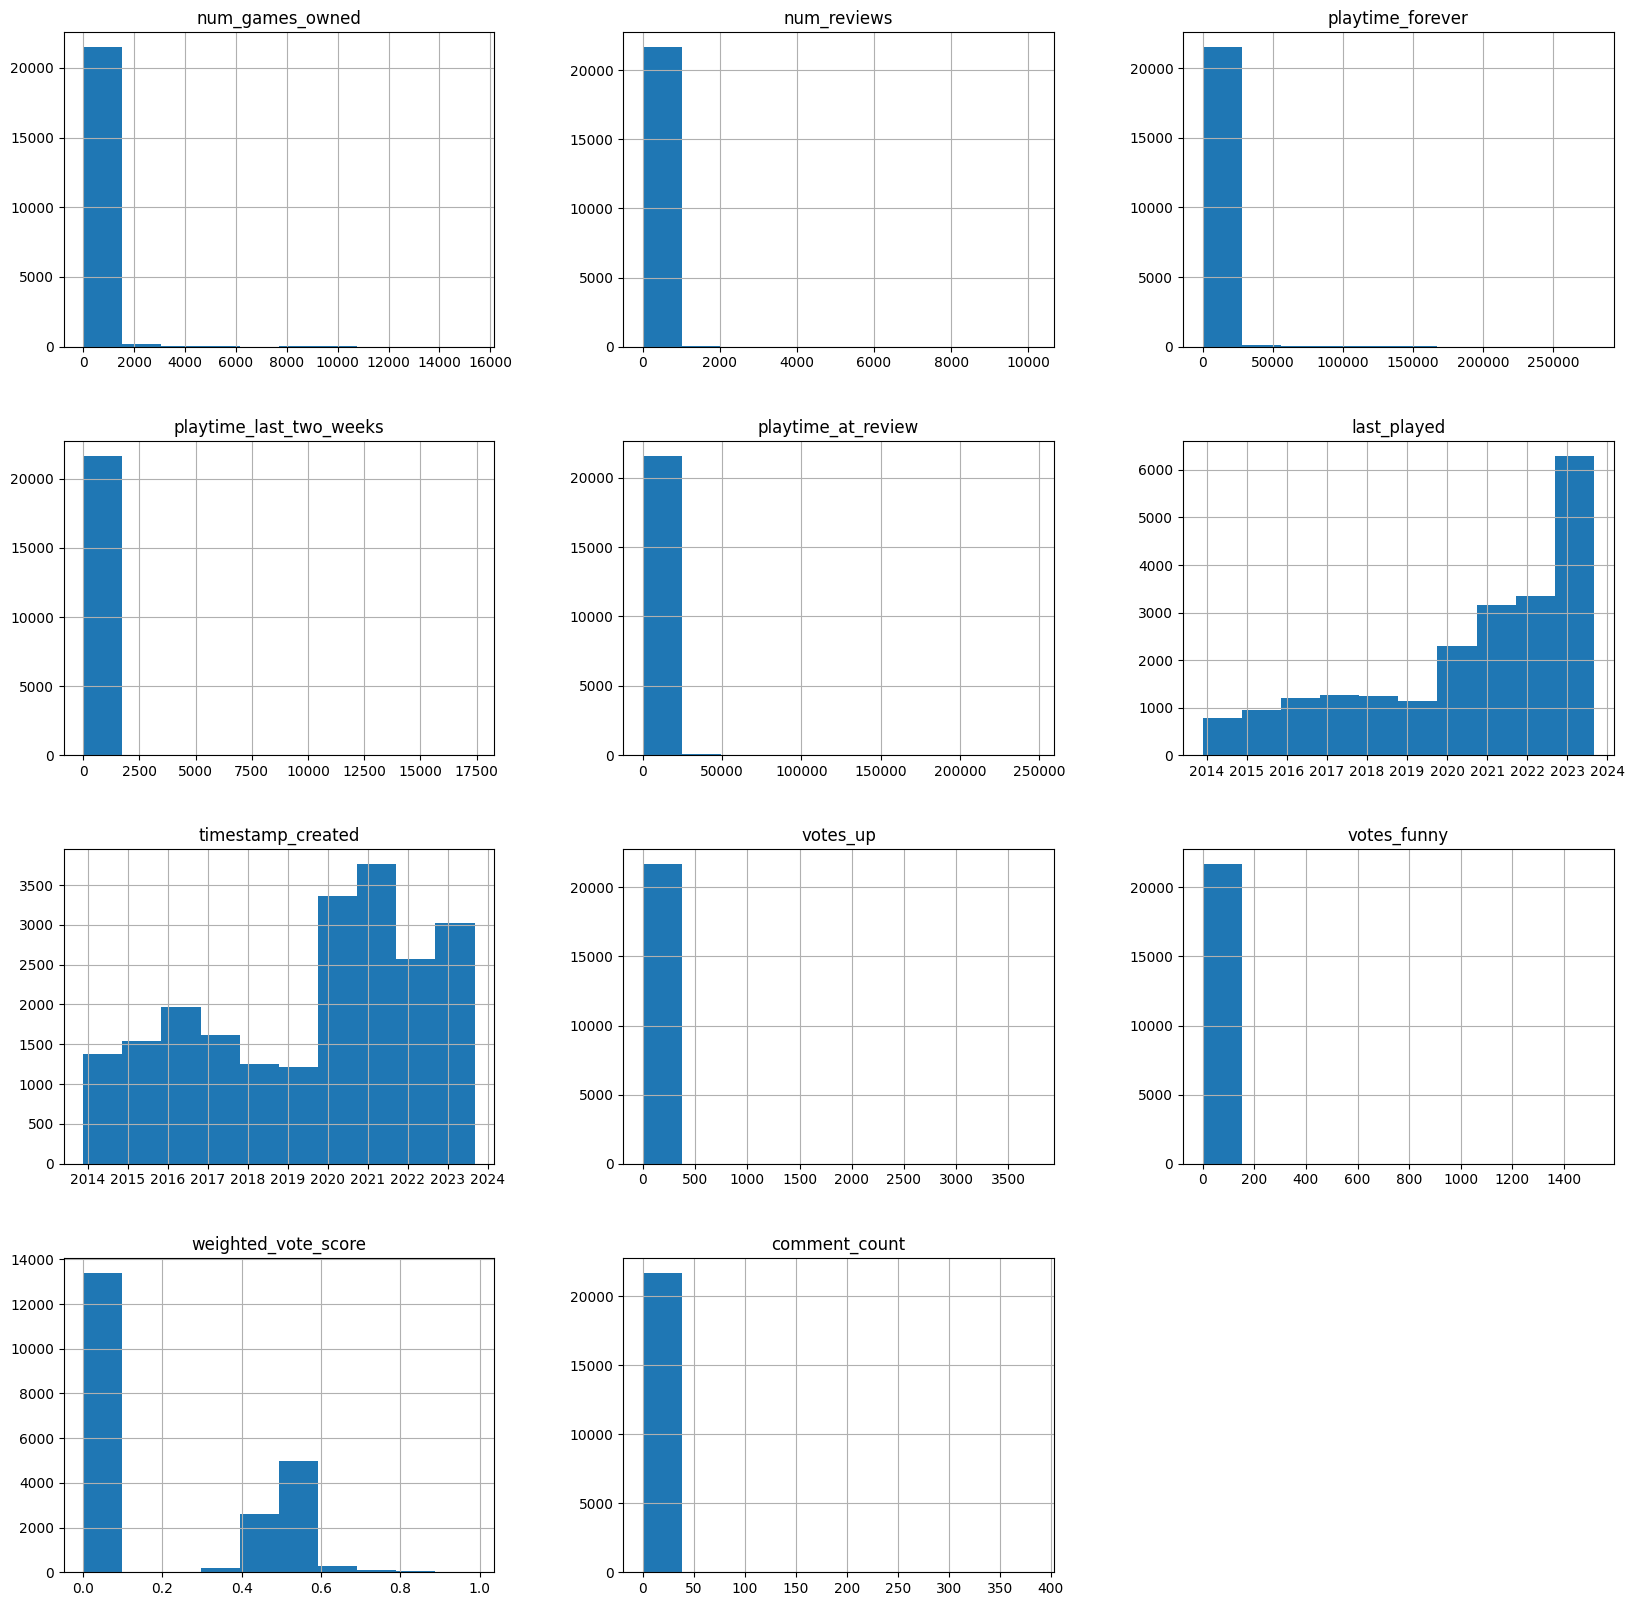

In [193]:
ass_creed_clean.hist(figsize=(20, 20));

Taking a closer look at the distribution of each column, we can see the majority of the data for votes, comment, as well asnumber of games owned and reviews given, all fell within the lower portion of the histogram. 

This gives us a good idea of the general idea of the numbers ranging for the reviews.

Now, let's look at the correlation of the features

### Correlation of Features

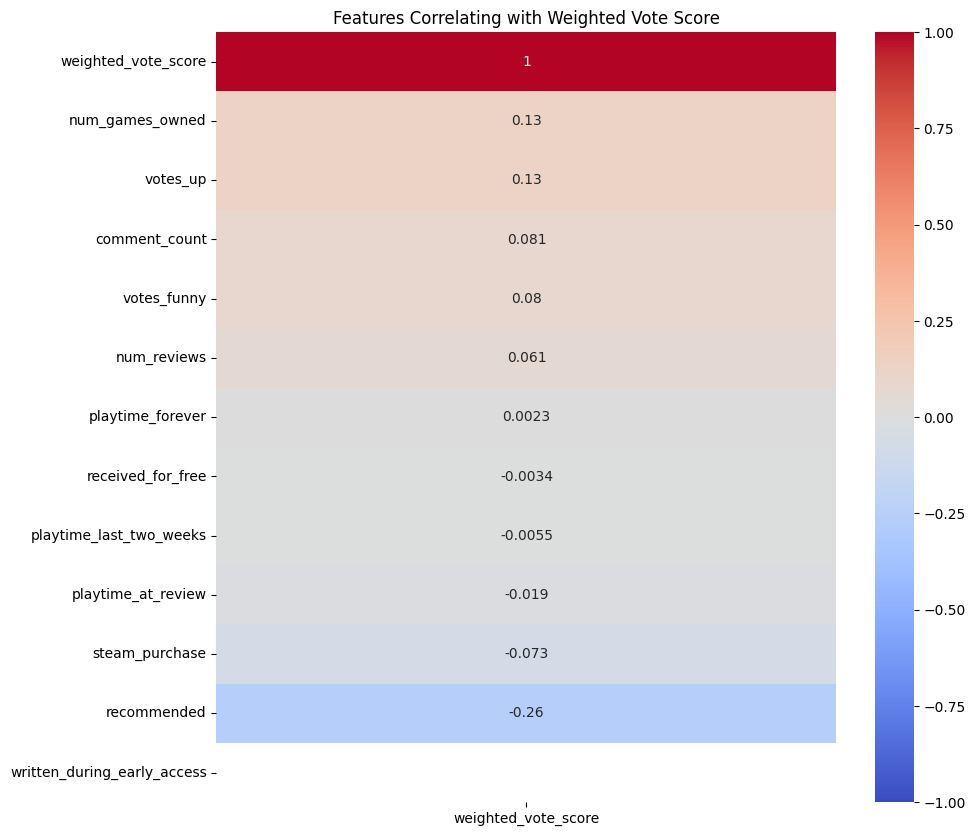

In [194]:
plt.figure(figsize=(10, 10))

heatmap = sns.heatmap(ass_creed_clean.corr(numeric_only = True)[['weighted_vote_score']].sort_values(by='weighted_vote_score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm');
heatmap.set_title('Features Correlating with Weighted Vote Score');


The correlation heatmap informs us that the more important features that affect whether one has a higher weighted vote score is based off the number of games they owned, number of up votes and funny votes the reviews get, number of comments left on their review, as well as the number of reviews previously written by the Steam user.

Taking a closer look at the pairplots, let's check how the features affect one another.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/yjq/Desktop/DATA_JOURNEY/mambaforge/envs/junny-capstone/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


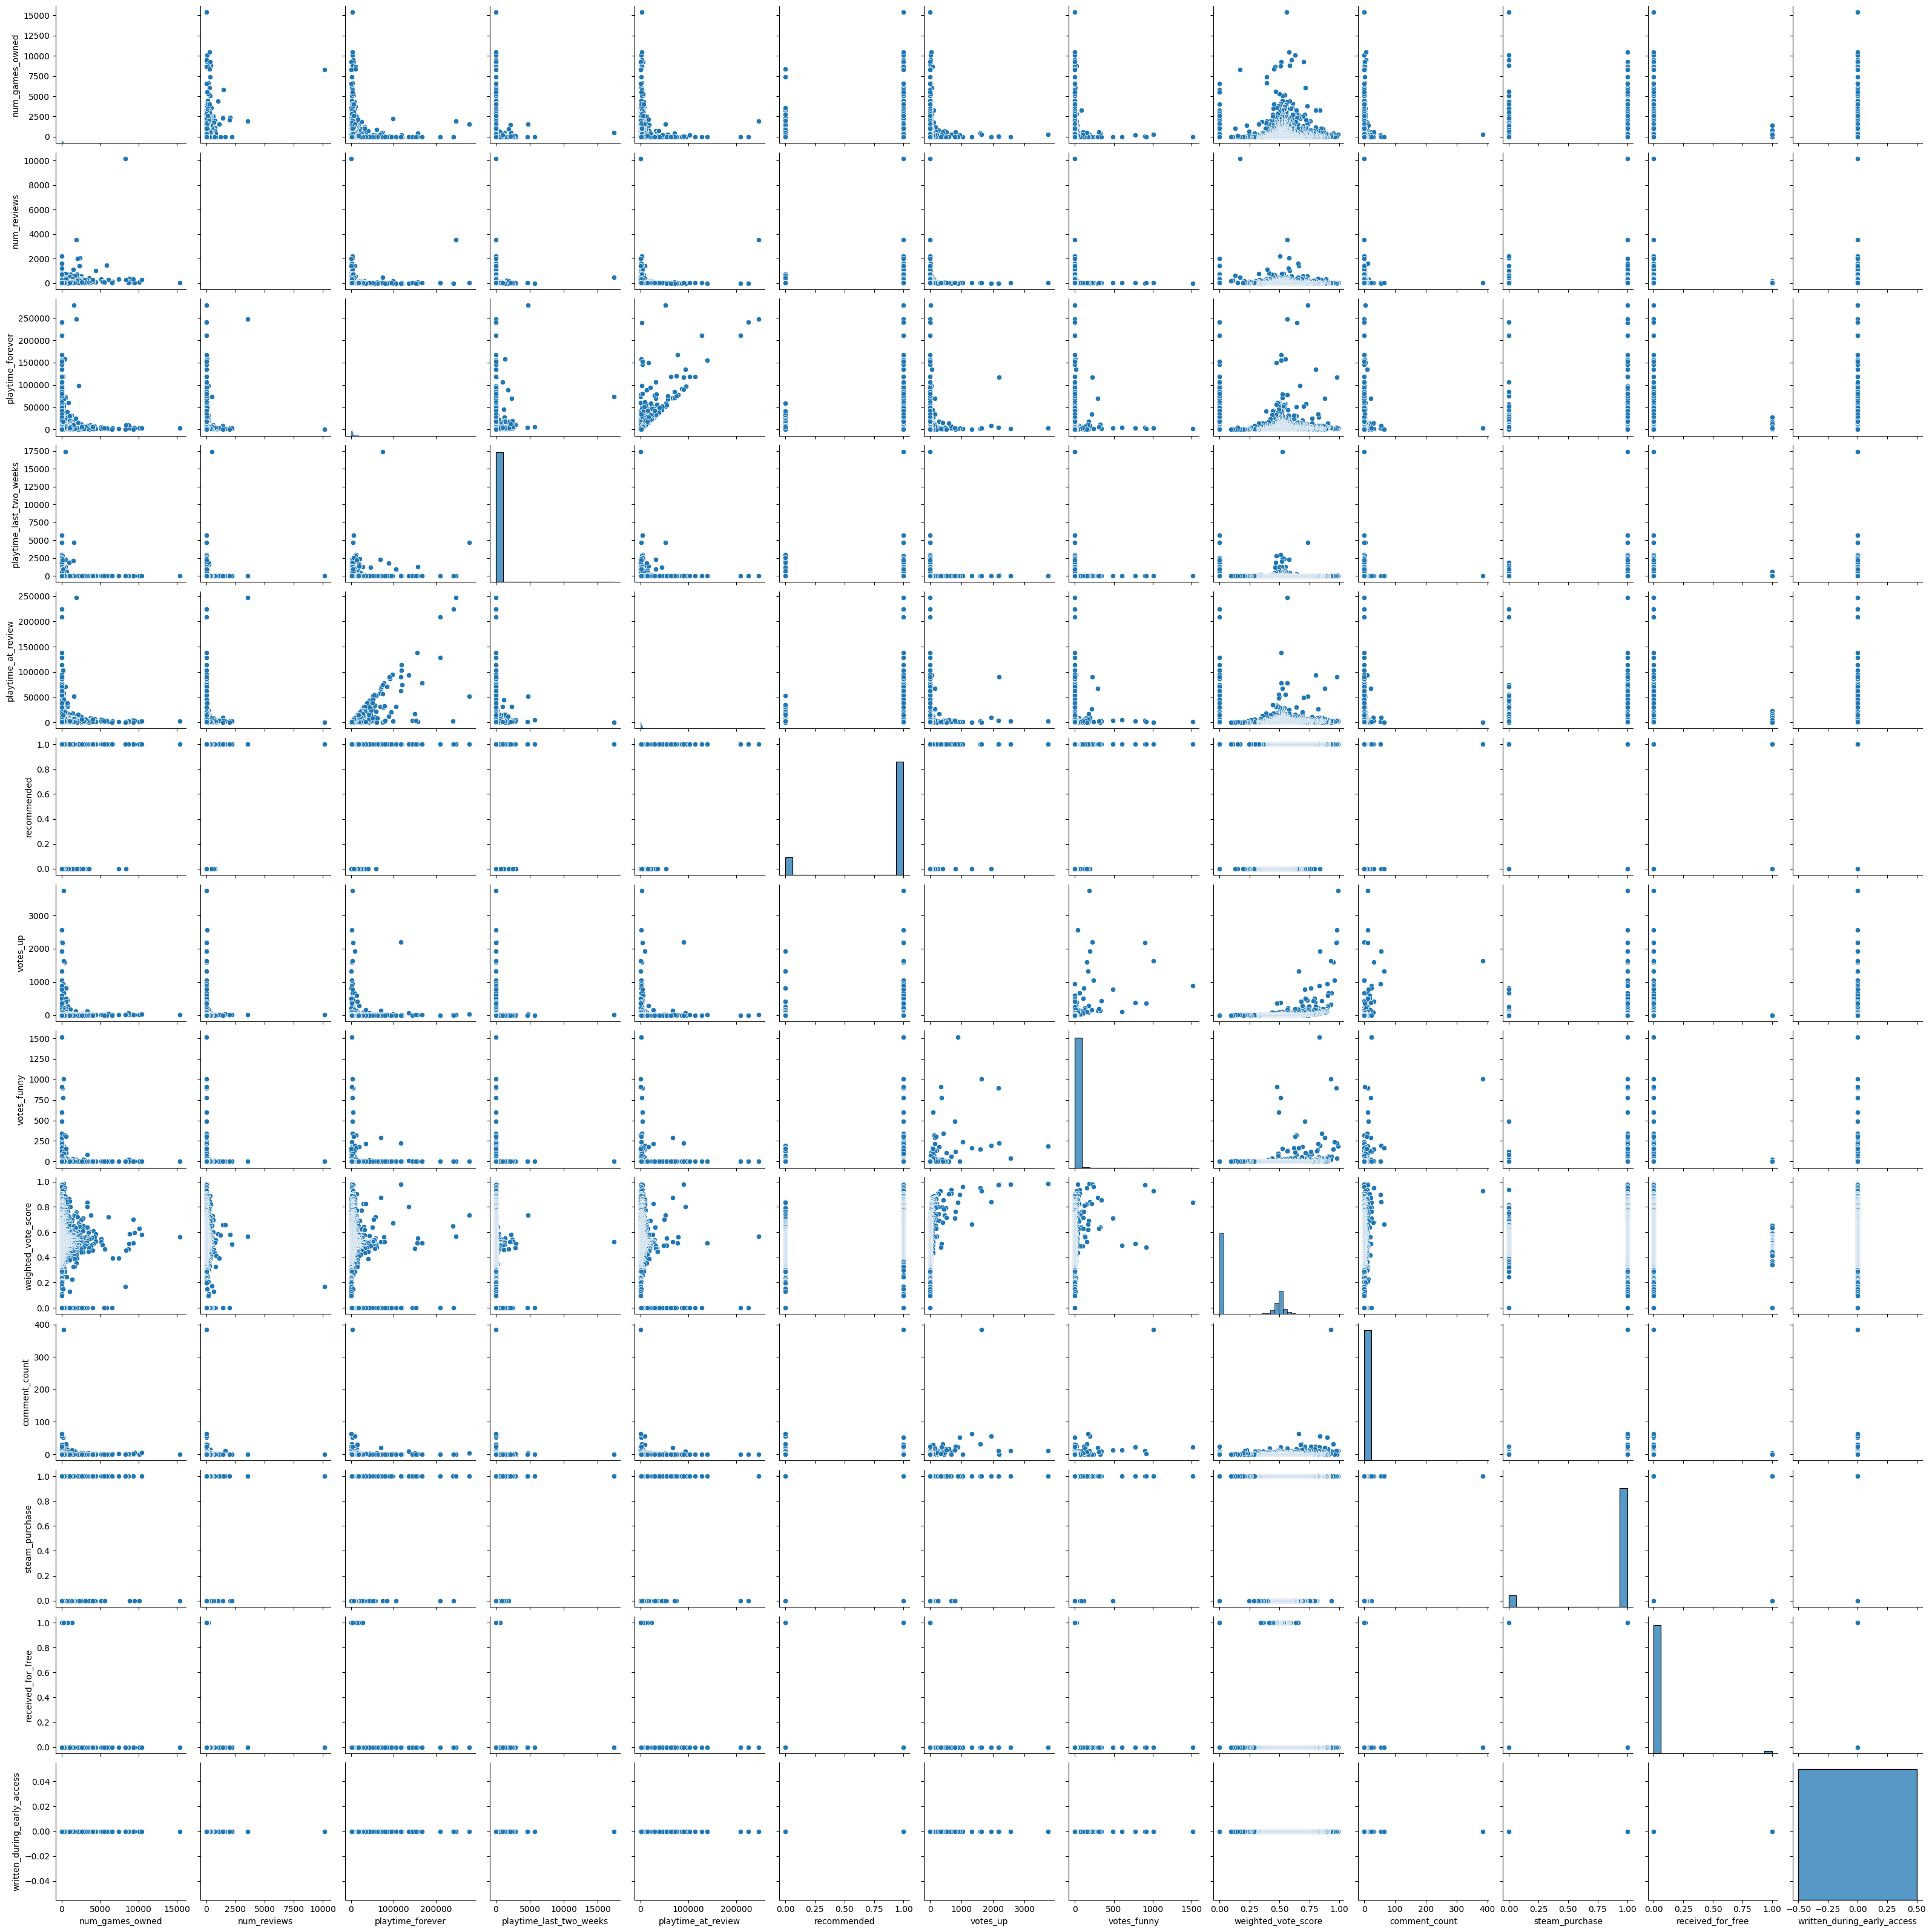

In [195]:
sns.pairplot(ass_creed_clean);

We can note that the number of Steam reviews had a much lower portion of non-recommended reviews compared to recommended. This is good as it means that the game has had a lot more positive than negative impact on their consumers.

Another thing to note from the pairplots is the relationship between the number of upvotes and funny votes receive do have a significant impact on the wieghtage score of the review. In addition, the comment count has quite a significant effect as well.

Delving into the reviews column, let's take a look at the length of our reviews.

### Length of Reviews

In [224]:
def count_words(review):
    words = review.split()
    return len(words)

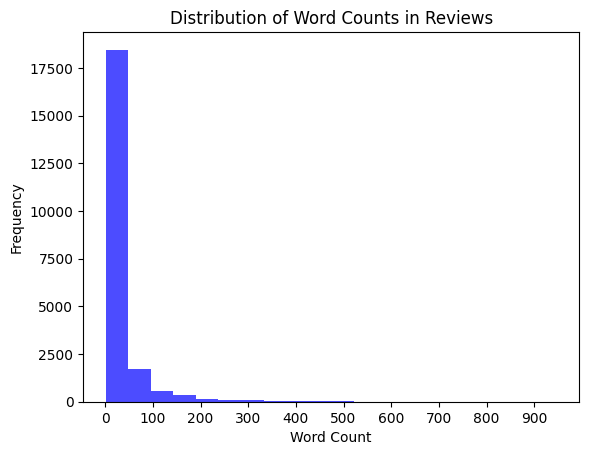

In [233]:
ass_creed_clean['word_count'] = ass_creed_clean['review'].apply(count_words)

plt.hist(ass_creed_clean['word_count'], bins=20, color='blue', alpha=0.7);
plt.xticks(np.arange(0, 1000, step=100))
plt.xlabel('Word Count');
plt.ylabel('Frequency');
plt.title('Distribution of Word Counts in Reviews');
plt.show();

We can see that majority of reviews had uner 50 words, but there are some anomalies with over 500 words in their reviews.

Let's narrow this range down to see a better graphical analysis of our words.

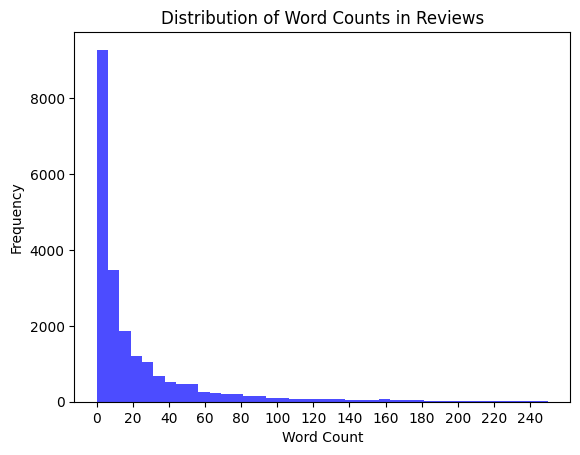

In [237]:
plt.hist(ass_creed_clean['word_count'], bins=40, color='blue', alpha=0.7, range=(0,250));
plt.xlabel('Word Count');
plt.xticks(np.arange(0, 250, step=20))
plt.ylabel('Frequency');
plt.title('Distribution of Word Counts in Reviews');
plt.show();

Majority of reviews fell under the 10 word mark. This could affect the Text Summarization portion of our experimentation, having too little text to summarise, or even too little information to label with topics.

Let's take a closer look into the more common words in our review.

### Word Cloud of popular words

Viewing these as a word cloud to see the most common words

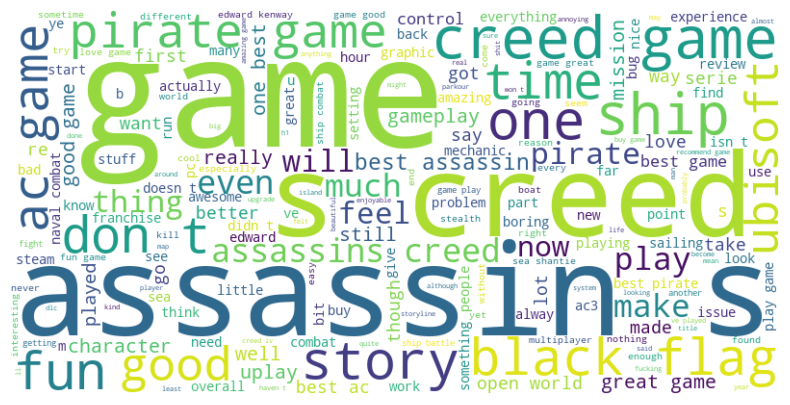

In [196]:
all_sentences = ' '.join(ass_creed_clean['review'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_sentences)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We can see that the words 'assassin creed', 'black flag', and 'game' come up quite often. This is given, considering the topic of the reviews. Let's remove these to get a more accurate representation of what words are more common with no relation to the game.

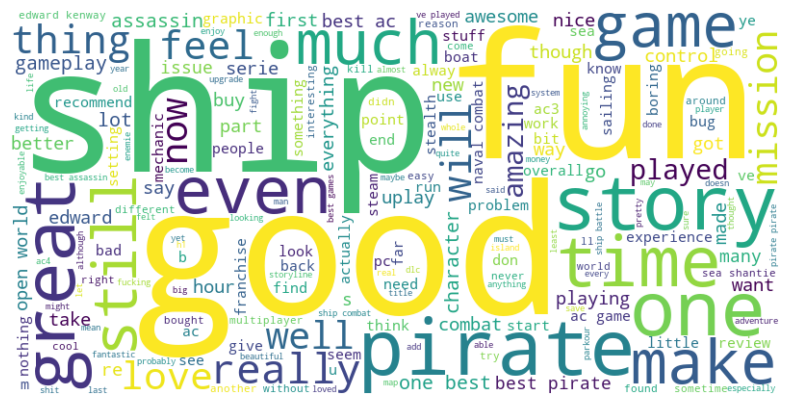

In [214]:
ass_creed_clean_2 = stop_stem(ass_creed_clean, 'review', ["assassin's", 'creed', 'assassin', 'black flag', 'black', 'flag', 'game', 'play', 'ubisoft', "'s", "'t"])

all_sentences = ' '.join(ass_creed_clean_2)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_sentences)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This would be a more accurate representation of more common words. As the nature of the game is a pirate ship game, it would make sense for pirate and ship to be common words. 'stori' (story) seems to be a very common word as well, likely people are either loving or hating the storyline of the game. 

We can see good positive feedback from words like 'great', 'fun', and 'love', so this may be a good indication of what most people feel about the game. However, let's look into the bar chart of the more common words to have a clearer visual of this.

### Bar Graph of Popular Words

In [215]:
corpus = ' '.join(ass_creed_clean_2)

# Tokenization
tokens = word_tokenize(corpus)

# Count unique words
word_counts = Counter(tokens)

top_25 = word_counts.most_common(25)

top_25

[('not', 5756),
 ('pirate', 5593),
 ('good', 5412),
 ('best', 5175),
 ('story', 4968),
 ('one', 4611),
 ('like', 4572),
 ('games', 4089),
 ('ac', 3962),
 ('fun', 3895),
 ('great', 3656),
 ('ship', 3584),
 ('(', 3563),
 ('get', 3334),
 ('time', 3064),
 ('very', 3009),
 ('really', 2968),
 ('[', 2815),
 ('more', 2791),
 (']', 2759),
 ('some', 2571),
 ('up', 2504),
 ('even', 2442),
 ('combat', 2403),
 ('out', 2400)]

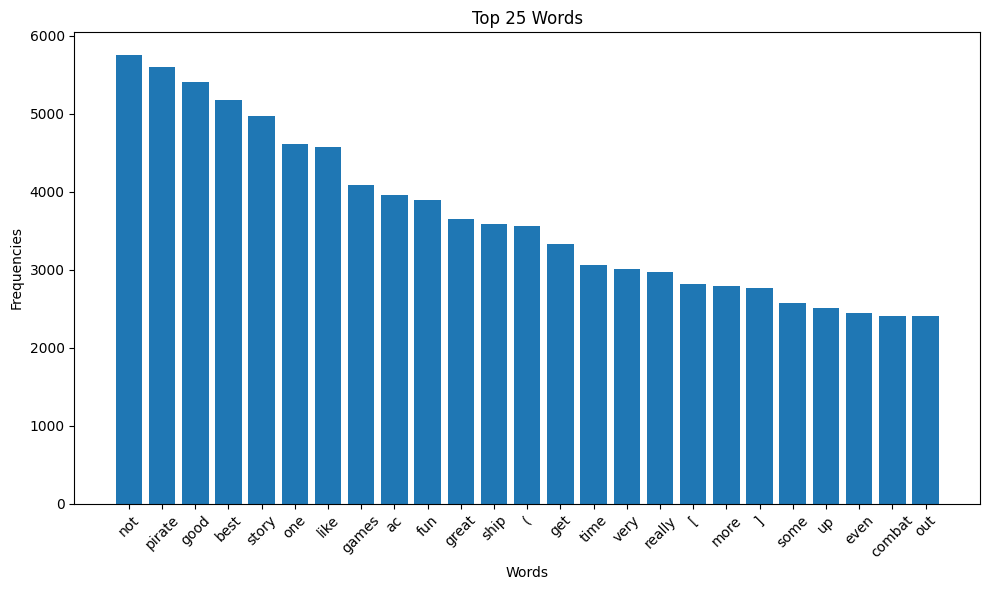

In [216]:
words = [word[0] for word in top_25]
frequencies = [word[1] for word in top_25]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Top 25 Words")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The top few words consist of both 'not' and 'good'. There is no guarantee that these two words are usually found together, hence we cannot assume that majority of reviews said the game was 'not good'. Let's check the top 2-gram words to see what the consensus of the game were.

In [220]:
tfid = TfidfVectorizer(ngram_range=(2,2))

ngram_features = tfid.fit_transform(ass_creed_clean_2)
ngram_names = tfid.get_feature_names_out()
ngram_df = pd.DataFrame(ngram_features.toarray(), columns = ngram_names)

ngram_frequencies = ngram_df.sum().astype(int)

sorted_ngrams = ngram_frequencies.sort_values(ascending = False)

ngram_25 = sorted_ngrams.head(25)

ngram_25

best ac           259
one best          187
very good         157
best pirate       150
10 10             145
best assassins    134
best ever         114
ever played        82
best games         80
ac games           77
very fun           74
open world         66
best series        64
pirate ever        62
sea shanties       55
ac ever            55
very nice          52
really good        50
good story         49
ever made          48
great story        46
pretty good        46
naval combat       44
games ever         43
better than        42
dtype: int64

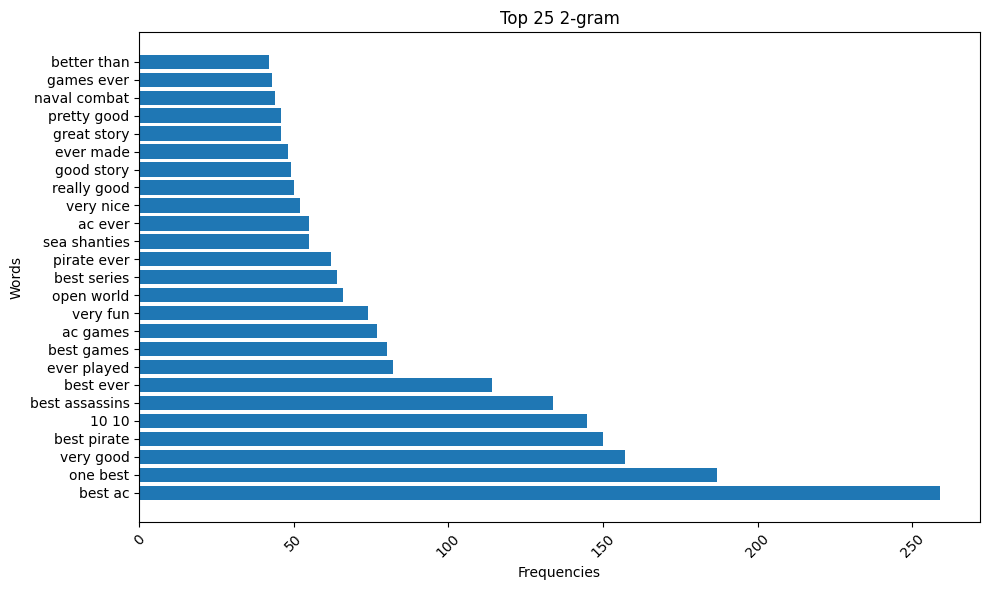

In [238]:
plt.figure(figsize=(10, 6))
plt.barh(ngram_25.index, ngram_25.values)
plt.xlabel("Frequencies")
plt.ylabel("Words")
plt.title("Top 25 2-gram")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Looking through the most common n-gram 2 words, we can see 'best ac' and the words 'best' being part of most of them. ('ac' referring the assassins creed in short). 

It can be safe to say that most people really enjoyed the game, giving good reviews such as the fact that it is one of the best pirate/assassins creed game every, especially liking the story as well. 

So we would wonder, what were people not liking then? Let's find out which n-gram 2 contained 'not' to see what people were dissatisfied about.

In [222]:
keyword = 'not'
filtered_ngrams = []

for ngram in sorted_ngrams.index:
    if keyword in ngram:
        filtered_ngrams.append(ngram)

filtered_ngrams_frequency = {}

for ngram in filtered_ngrams:
    frequency = sorted_ngrams[ngram]
    filtered_ngrams_frequency[ngram] = frequency

filtered_ngrams_df = pd.DataFrame(list(filtered_ngrams_frequency.items()), columns=['Ngram', 'Frequency']).head(25)

print(filtered_ngrams_df)

            Ngram  Frequency
0        not best         19
1         not buy         18
2        will not         16
3         not bad         16
4        not good         14
5        not work         12
6        not much         12
7        not like         11
8        not even         10
9        good not         10
10        not too         10
11     not really         10
12       not only         10
13        one not          9
14      not worth          8
15  not recommend          8
16        not get          7
17      story not          7
18       not very          7
19     pirate not          7
20        not fun          7
21      would not          6
22       not sure          6
23    not working          6
24        why not          6


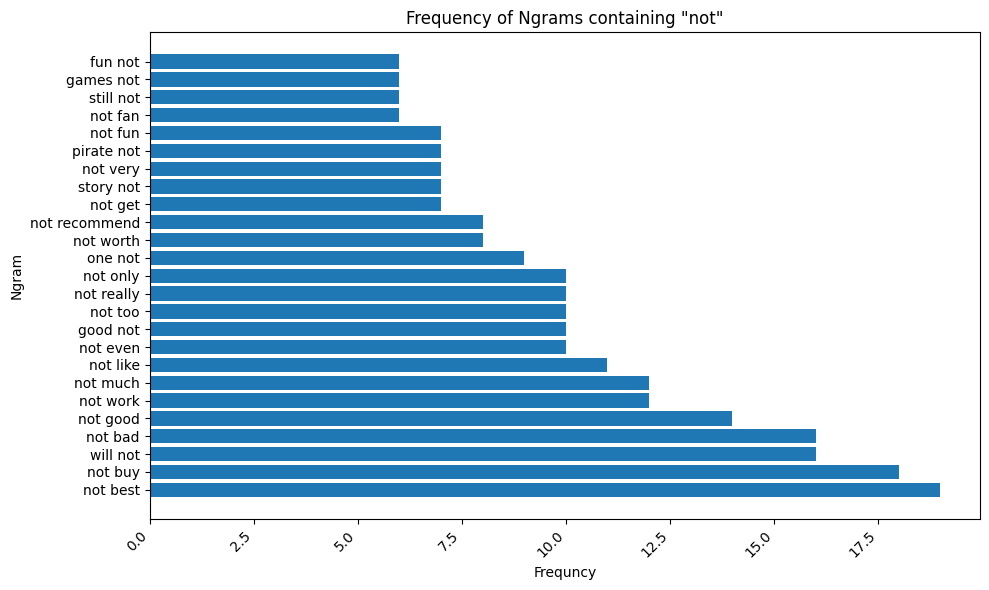

In [239]:
filtered_ngrams_df = pd.DataFrame(list(filtered_ngrams_frequency.items()), columns=['Ngram', 'Frequency'])

# Sort the DataFrame by frequency in descending order
filtered_ngrams_df = filtered_ngrams_df.sort_values(by='Frequency', ascending=False).head(25)

# Plotting
plt.figure(figsize=(10, 6));
plt.barh(filtered_ngrams_df['Ngram'], filtered_ngrams_df['Frequency']);
plt.xlabel('Frequncy');
plt.ylabel('Ngram');
plt.title(f'Frequency of Ngrams containing "{keyword}"');
plt.xticks(rotation=45, ha='right');
plt.tight_layout();

plt.show()

We can see that there were a number of people who disliked the game as well, mentioning things such as they would not buy it, or that it's not the best, things not working etc. 

However, this does not inform Ubisoft or consumers at a first glance on what they thought was "not best" or "will not" do or why they will "not buy".

This particular portion is not able to be targeted out via our analysis. This leads us to our Text Summarization portion along with our Multi-Label classification, so that Ubisoft and team will be able to better understand their consumers likes and dislikes, wants and needs out of the games.

Let's move on to the next notebook for our Text Summarization experimentation.